# GOOGLE PLAY STORE REVIEW AND PREDICTION

### Import Libraries

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the data file using pandas.

In [271]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv")

In [272]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [273]:
df.shape

(10841, 13)

### Check for null values in the data. Get the number of null values for each column.

In [274]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Drop records with nulls in any of the columns.


In [275]:
data=df.dropna()

In [276]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Check Datatypes


In [277]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

1.     Extract the numeric value from the column

2.     Multiply the value by 1,000, if size is mentioned in Mb

In [278]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [279]:
# Convert 'Varies with device' to NaN
data['Size'] = data['Size'].replace('Varies with device', pd.NA)

# Remove rows with NaN in the 'Size' column
data = data.dropna(subset=['Size'])

<ipython-input-279-842817f85fb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].replace('Varies with device', pd.NA)


In [280]:
# Extract numeric value from the 'Size' column and convert to unified unit
data['Size'] = data['Size'].str.replace('M', 'e+6').str.replace('k', 'e+3').astype(float)

In [281]:
data['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 5.50e+06, 1.70e+07, 3.90e+07, 3.10e+07,
       4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06, 9.20e+06,
       5.20e+06, 1.10e+07, 2.40e+07, 9.40e+06, 1.50e+07, 1.00e+07,
       1.20e+06, 2.60e+07, 8.00e+06, 7.90e+06, 5.60e+07, 5.70e+07,
       3.50e+07, 5.40e+07, 2.01e+05, 3.60e+06, 5.70e+06, 8.60e+06,
       2.40e+06, 2.70e+07, 2.70e+06, 2.50e+06, 7.00e+06, 1.60e+07,
       3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07, 3.20e+07,
       5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06, 9.80e+06,
       5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06, 7.10e+06,
       2.20e+07, 6.40e+06, 3.20e+06, 8.20e+06, 4.90e+06, 9.50e+06,
       5.00e+06, 5.90e+06, 1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06,
       4.00e+06, 2.30e+06, 2.10e+06, 4.20e+07, 9.10e+06, 5.50e+07,
       2.30e+04, 7.30e+06, 6.50e+06, 1.50e+06, 7.50e+06, 5.10e

In [282]:
data['Size'].dtypes

dtype('float64')

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [283]:
data['Reviews'] = data['Reviews'].astype(str).astype(float)

In [284]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Installs field is currently stored as string and has values like 1,000,000+.

1.     Treat 1,000,000+ as 1,000,000

2.     remove ‘+’, ‘,’ from the field, convert it to integer

In [285]:
print(data['Installs'])

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7723, dtype: object


In [286]:
#Remove '+'
data['Installs']=data['Installs'].str.replace('+',"")
print(data['Installs'])


0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7723, dtype: object


In [287]:
#Remove ','
data['Installs']=data['Installs'].str.replace(',',"")
print(data['Installs'])


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: object


In [288]:
# Convert to int
data['Installs'] = data['Installs'].astype(str).astype(int)

In [289]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Price field is a string and has "\$"  symbol. Remove ‘ $ ’ sign, and convert it to numeric.

In [290]:
#Remove '$'
data['Price']=data['Price'].str.replace('$',"")
print(data['Installs'])

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64


In [291]:
# Convert to float
data['Price'] = data['Price'].astype(str).astype(float)

In [292]:
data['Price'].dtypes


dtype('float64')

###  Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [293]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [294]:
data = data [(data['Rating'] >= 1) & (data['Rating'] <= 5)]

In [295]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

### Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [296]:
# Find rows where the number of reviews is greater than the number of installs
review_gt_installs = data[data['Reviews'] > data['Installs']]

# Display the rows where review is more than installs
print(review_gt_installs)


                        App Category  Rating  Reviews        Size  Installs  \
2454    KBA-EZ Health Guide  MEDICAL     5.0      4.0  25000000.0         1   
5917               Ra Ga Ba     GAME     5.0      2.0  20000000.0         1   
6700       Brick Breaker BR     GAME     5.0      7.0  19000000.0         5   
7402   Trovami se ci riesci     GAME     5.0     11.0   6100000.0        10   
8591                DN Blog   SOCIAL     5.0     20.0   4200000.0        10   
10697               Mu.F.O.     GAME     5.0      2.0  16000000.0         1   

       Type  Price Content Rating   Genres      Last Updated Current Ver  \
2454   Free   0.00       Everyone  Medical    August 2, 2018      1.0.72   
5917   Paid   1.49       Everyone   Arcade  February 8, 2017       1.0.4   
6700   Free   0.00       Everyone   Arcade     July 23, 2018         1.0   
7402   Free   0.00       Everyone   Arcade    March 11, 2017         0.1   
8591   Free   0.00           Teen   Social     July 23, 2018      

In [297]:
# Drop rows where the number of reviews is greater than the number of installs
data = data[data['Reviews'] <= data['Installs']]


In [298]:
# Find rows where the number of reviews is greater than the number of installs
review_gt_installs = data[data['Reviews'] > data['Installs']]

# Display the rows where review is more than installs
print(review_gt_installs)


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


### For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [299]:
# Find rows where the price is marked as "Free" but the cost is higher than 0
free_with_cost = data[(data['Type'] == 'Free') & (data['Price'] > 0)]

# Display the rows where price is marked as "Free" but the cost is higher than 0
print(free_with_cost)


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [300]:
data = data[~((data['Type'] == 'Free') & (data['Price'] > 0))]


In [301]:
# Find rows where the price is marked as "Free" but the cost is higher than 0
free_with_cost = data[(data['Type'] == 'Free') & (data['Price'] > 0)]

# Display the rows where price is marked as "Free" but the cost is higher than 0
print(free_with_cost)


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [302]:
data['Type'].dtypes


dtype('O')

In [303]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

### Boxplot for Price
·       Are there any outliers? Think about the price of usual apps on Play Store.

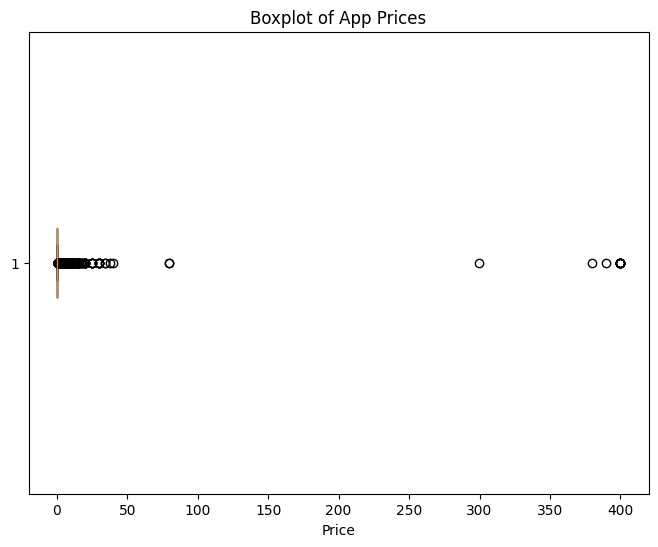

In [304]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot of App Prices')
plt.show()

###  Boxplot for Reviews

·       Are there any apps with very high number of reviews? Do the values seem right?

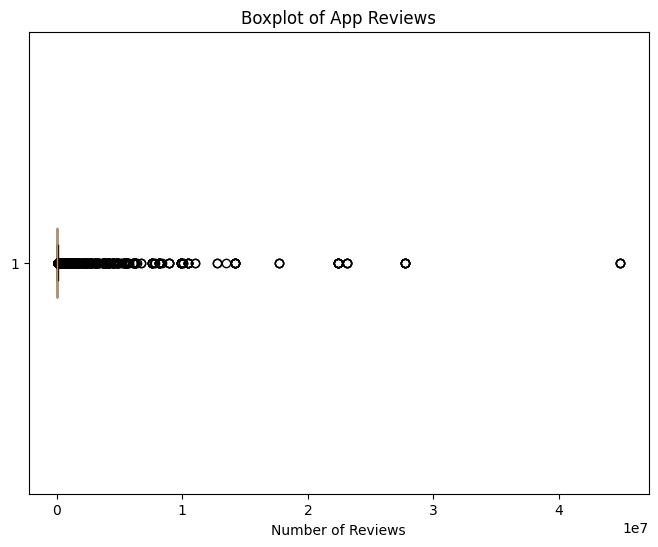

In [305]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Reviews'], vert=False)
plt.xlabel('Number of Reviews')
plt.title('Boxplot of App Reviews')
plt.show()

### Histogram for Rating

·       How are the ratings distributed? Is it more toward higher ratings?

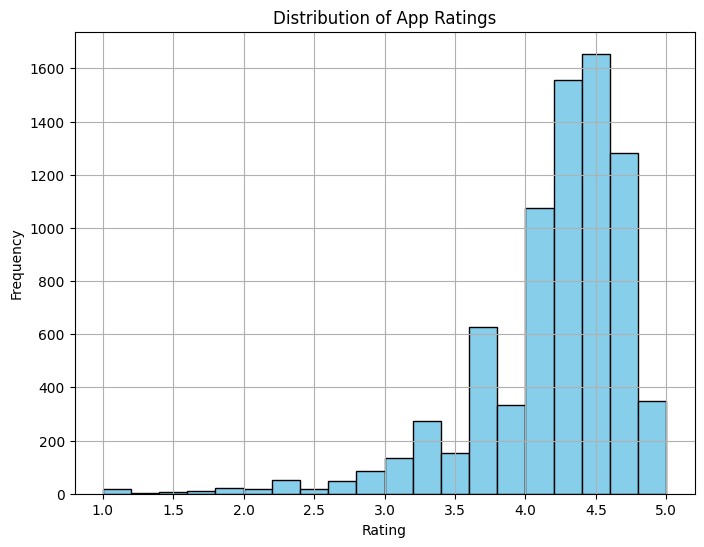

In [306]:
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')
plt.grid(True)
plt.show()

###  Histogram for Size

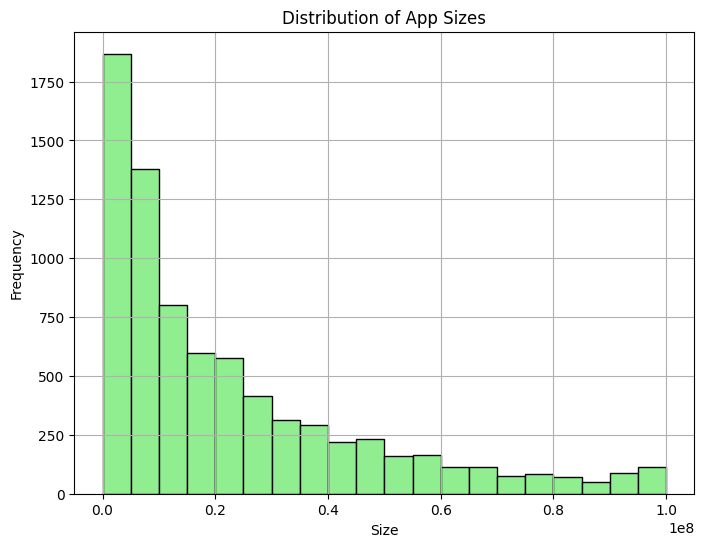

In [307]:
plt.figure(figsize=(8, 6))
plt.hist(data['Size'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.grid(True)
plt.show()

### Note down your observations for the plots made above. Which of these seem to have outliers?

### Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

1.     Check out the records with very high price

1.     Is 200 indeed a high price?

2.     Drop these as most seem to be junk apps

In [308]:
data['Price'].describe()

count    7717.000000
mean        1.128725
std        17.414784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [309]:
data = data[data['Price'] <= 200]

In [310]:
data['Price'].describe()

count    7702.000000
mean        0.368802
std         2.348127
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

### Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.


In [311]:
d = data[data['Reviews'] >= 2000000]
print(d)


                                               App       Category  Rating  \
345                    Yahoo Mail – Stay Organized  COMMUNICATION     4.3   
347                  imo free video calls and chat  COMMUNICATION     4.3   
366    UC Browser Mini -Tiny Fast Private & Secure  COMMUNICATION     4.4   
378    UC Browser - Fast Download Private & Secure  COMMUNICATION     4.5   
383                  imo free video calls and chat  COMMUNICATION     4.3   
...                                            ...            ...     ...   
9142                     Need for Speed™ No Limits           GAME     4.4   
9166                  Modern Combat 5: eSports FPS           GAME     4.3   
10186                             Farm Heroes Saga         FAMILY     4.4   
10190                              Fallout Shelter         FAMILY     4.6   
10327                             Garena Free Fire           GAME     4.5   

          Reviews        Size   Installs  Type  Price Content Rating  \
345

In [312]:
# Drop records with more than 2 million reviews
data = data[data['Reviews'] <= 2000000]


In [313]:
d = data[data['Reviews'] >= 2000000]
print(d)


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


### Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

1.     Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

2.     Decide a threshold as cutoff for outlier and drop records having values more than that

In [314]:
# Find out different percentiles
percentiles = [10, 25, 50, 70, 90, 95, 99]
install_percentiles = data['Installs'].quantile([p / 100 for p in percentiles])

# Print out the percentiles
print("Percentiles:")
print(install_percentiles)

Percentiles:
0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64


In [315]:
#We'll choose 10000000 as threshold as max lies above this
threshold = 10000000  # For example, setting the threshold at 10 million installs

# Drop records with values more than the threshold
data = data[data['Installs'] <= threshold]

### Make scatter plot/joinplot for Rating vs. Price

1.     What pattern do you observe? Does rating increase with price?

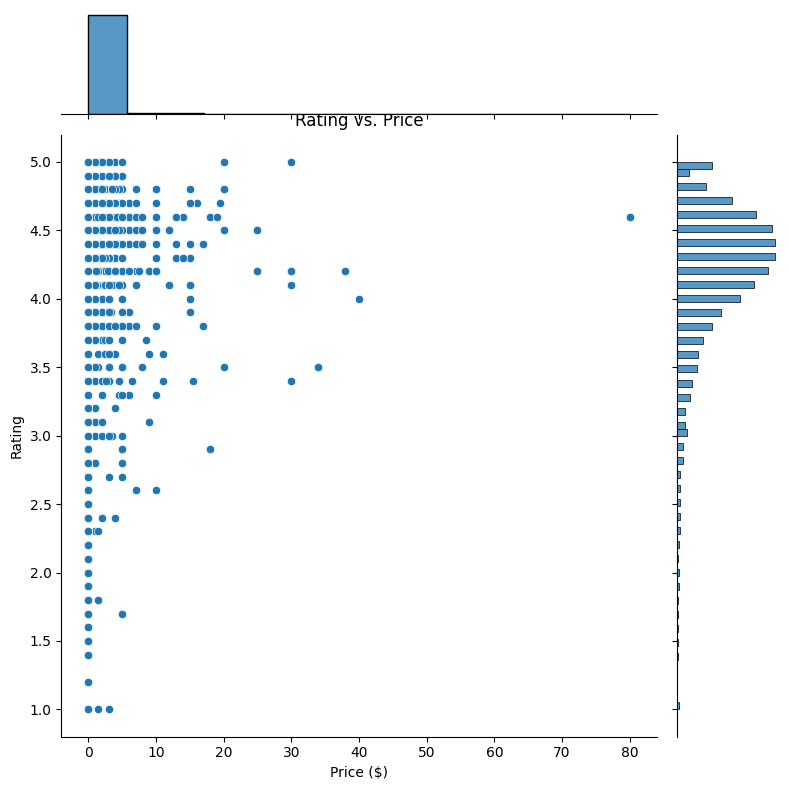

In [316]:
sns.jointplot(x='Price', y='Rating', data=data, kind='scatter', height=8)
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.title('Rating vs. Price')
plt.show()

 ### Make scatter plot/joinplot for Rating vs. Size

1.     Are heavier apps rated better?

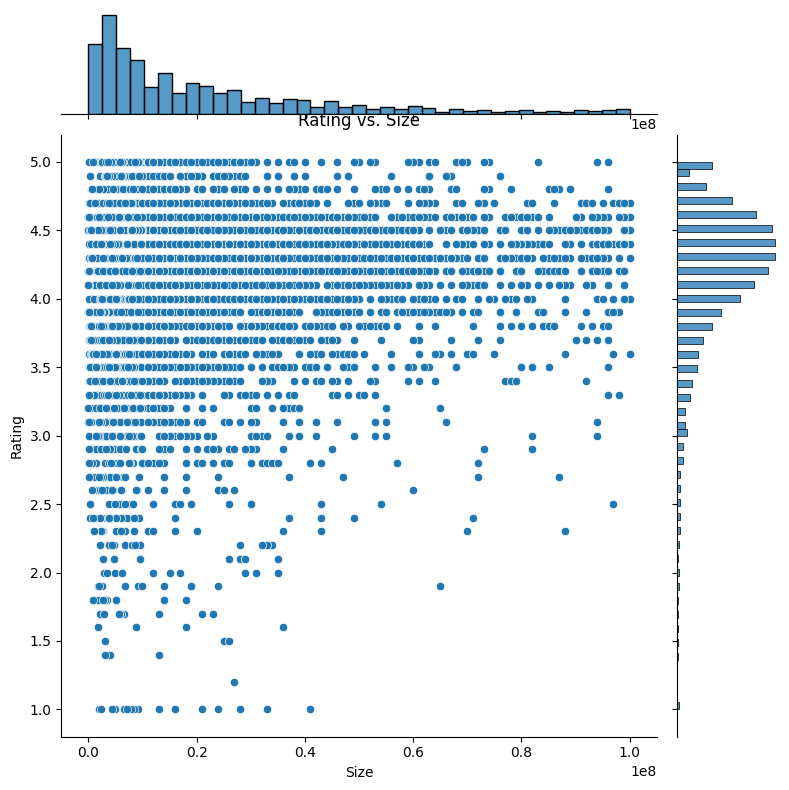

In [317]:
sns.jointplot(x='Size', y='Rating', data=data, kind='scatter', height=8)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Rating vs. Size')
plt.show()

### Make scatter plot/joinplot for Rating vs. Reviews

1.     Does more review mean a better rating always?

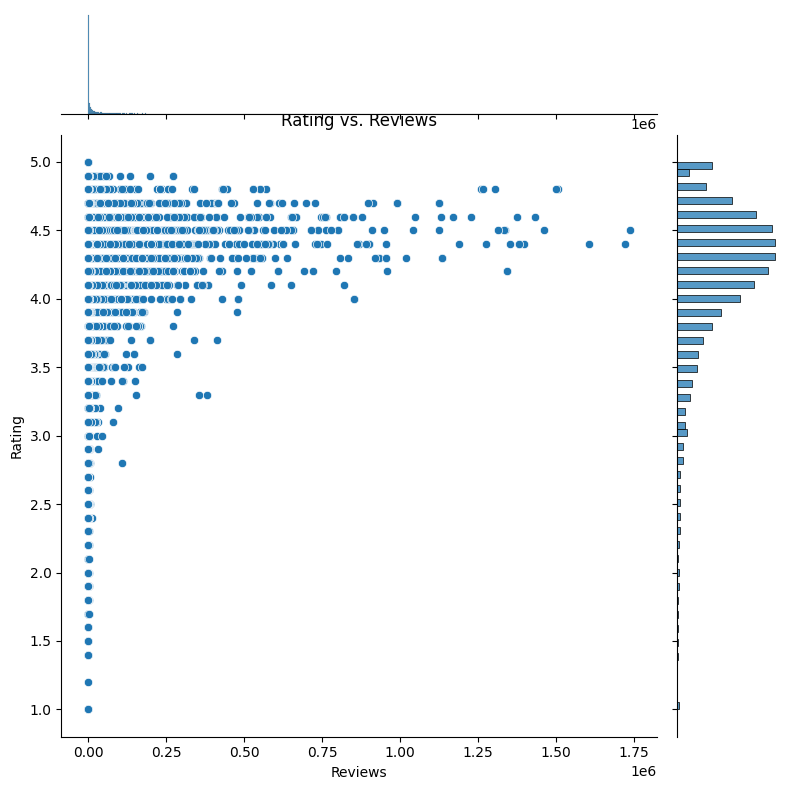

In [318]:
sns.jointplot(x='Reviews', y='Rating', data=data, kind='scatter', height=8)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Rating vs. Reviews')
plt.show()

### Make boxplot for Rating vs. Content Rating

1.     Is there any difference in the ratings? Are some types liked better?

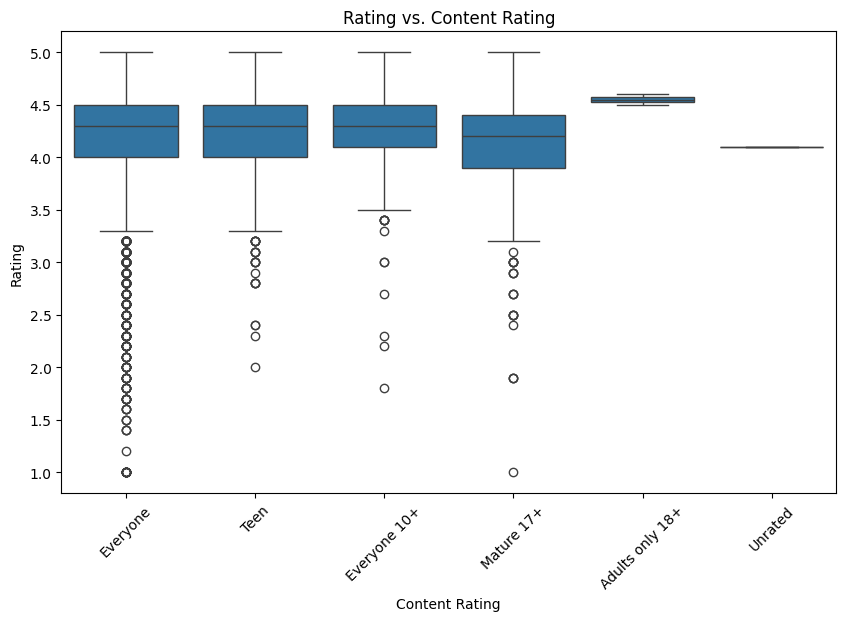

In [319]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Content Rating', y='Rating', data=data)
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Rating vs. Content Rating')
plt.xticks(rotation=45)
plt.show()

### Make boxplot for Ratings vs. Category

1.     Which genre has the best ratings?

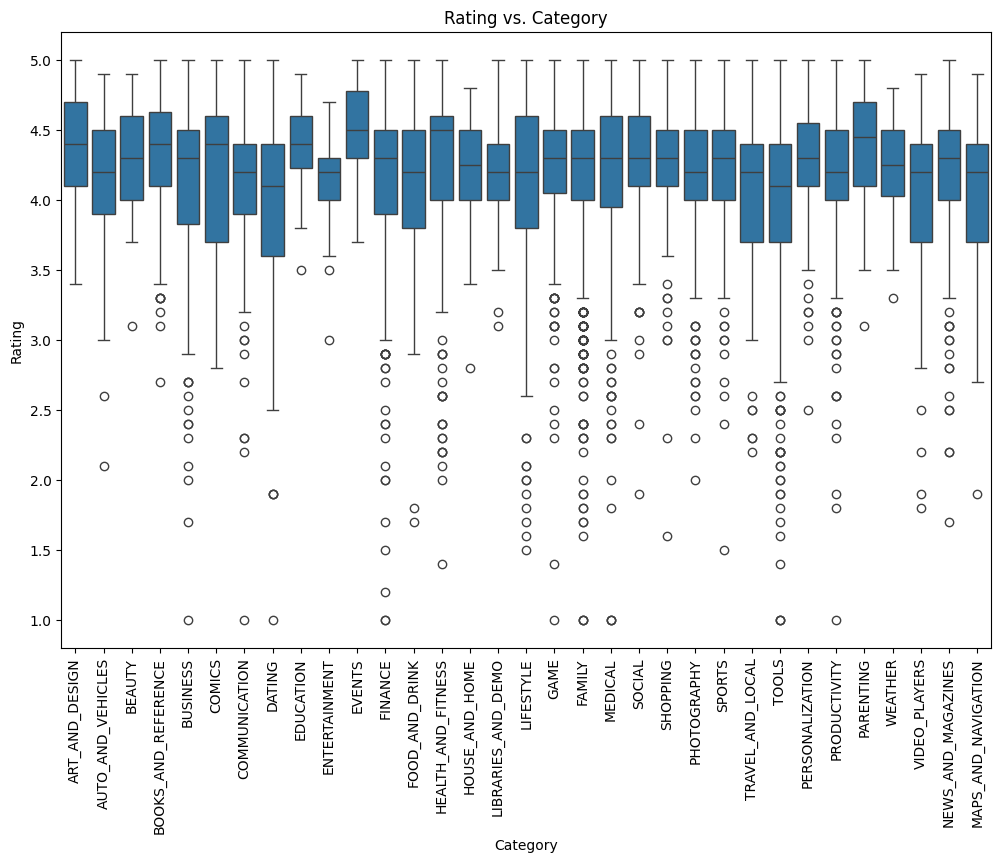

In [320]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=data)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating vs. Category')
plt.xticks(rotation=90)
plt.show()

### create a copy of the dataframe to make all the edits. Name it inp1.

In [321]:
# Create a copy of the DataFrame 'data' and name it 'inp1'
inp1 = data.copy()


###  Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs

In [322]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

### Drop columns 'App', 'Last Updated', 'Current Ver', and 'Android Ver'

In [323]:
# Drop columns 'App', 'Last Updated', 'Current Ver', and 'Android Ver'
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)


### Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [324]:
inp2.dtypes

Rating                       float64
Reviews                      float64
Size                         float64
Installs                     float64
Price                        float64
                              ...   
Content Rating_Mature 17+       bool
Content Rating_Teen             bool
Content Rating_Unrated          bool
Type_Free                       bool
Type_Paid                       bool
Length: 158, dtype: object

In [325]:
# Copy the DataFrame inp1 to create inp2
inp2 = inp1.copy()

# Get dummy columns for 'Category', 'Genres', and 'Content Rating'
inp2 = pd.get_dummies(inp2, columns=['Category', 'Genres', 'Content Rating','Type'])

# Display the first few rows of inp2 to verify the transformation
print(inp2.head())


   Rating    Reviews        Size   Installs  Price  Category_ART_AND_DESIGN  \
0     4.1   5.075174  19000000.0   9.210440    0.0                     True   
1     3.9   6.875232  14000000.0  13.122365    0.0                     True   
2     4.7  11.379520   8700000.0  15.424949    0.0                     True   
4     4.3   6.875232   2800000.0  11.512935    0.0                     True   
5     4.4   5.123964   5600000.0  10.819798    0.0                     True   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                       False            False                         False   
1                       False            False                         False   
2                       False            False                         False   
4                       False            False                         False   
5                       False            False                         False   

   Category_BUSINESS  ...  Genres_Weather  G

In [326]:
inp2.dtypes

Rating                       float64
Reviews                      float64
Size                         float64
Installs                     float64
Price                        float64
                              ...   
Content Rating_Mature 17+       bool
Content Rating_Teen             bool
Content Rating_Unrated          bool
Type_Free                       bool
Type_Paid                       bool
Length: 158, dtype: object

### Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [327]:
# Define features (X) and target variable (y)
X = inp2.drop('Rating', axis=1)  # Features (all columns except 'Rating')
y = inp2['Rating']  # Target variable ('Rating')


In [328]:
from sklearn.model_selection import train_test_split
# Perform train-test split with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [329]:
# Create DataFrames df_train and df_test
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Display the shapes of the train and test sets
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (5114, 158)
Shape of df_test: (2193, 158)


### Model building

·       Use linear regression as the technique

·       Report the R2 on the train set

In [330]:
#Importing Libraries for ML Modelling
from sklearn.linear_model import LinearRegression
#Creating the Linear Regression Model
model=LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [331]:
#predicting x_train values
y_predtrain=model.predict(X_train)

In [332]:
y_predtrain

array([4.4947308 , 4.19707438, 4.27263089, ..., 3.89272026, 4.23883745,
       4.28630651])

In [333]:
# Report the R2 on the train set
from sklearn.metrics import r2_score
print("R2 Score of Train Dataset", r2_score(y_train, y_predtrain))

R2 Score of Train Dataset 0.16036440979501365


### Make predictions on test set and report R2.

In [334]:
pred=model.predict(X_test)

In [335]:
pred

array([4.27089602, 4.32229772, 4.35506533, ..., 4.4557365 , 4.65586067,
       4.04434699])

In [336]:
print("R2 Score of Train Dataset", r2_score(y_test, pred))

R2 Score of Train Dataset 0.11710848198323176
